In [1]:
from flaskexample.perfume_recommendation import Fragrance_Retrieve_Model
import pandas as pd
import numpy as np
import random
gre = Fragrance_Retrieve_Model()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/biqiongyu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/biqiongyu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/anaconda3/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/anaconda3/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
/anaconda3/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'Se

In [2]:
#total number of products
print(gre.df.shape[0])

255


In [3]:
#pick the products with "Fragrance Family" label

clasification_list = pd.notna(gre.df["Fragrance Family"])
clasification_df = gre.df.loc[clasification_list]
clasification_df.reset_index(inplace=True)
tot_count = clasification_df.shape[0]
print(clasification_df.shape)


(169, 15)


In [4]:
clasification_df.head()

,index,name,product_id,rating,description,product_image_url,review_text_combine,brand,price,Fragrance Family,Type,Key Notes,About,text_tot,display
0,1,1 Million Lucky,P431565,4.76,Fragrance Family: Earthy & WoodyScent Type: Wa...,https://www.sephora.com/productimages/sku/s203...,"Everytime I spray this on in the morning, I'm ...",Paco Rabanne,$70.00,Earthy & Woody Scent,Warm Woods,"Hazelnut, Green Plum, Cedar","With unlimited potential and endless fun, lif...","Hazelnut, Green Plum, Cedar With unlimited p...","With unlimited potential and endless fun, lif..."
1,4,ALLURE HOMME SPORT EAU EXTRÊME Eau de Parfum,P377719,5.00,Fragrance Family: Earthy & WoodyScent Type: Wa...,https://www.sephora.com/productimages/sku/s141...,This is one of my favorites (besides Polo Red)...,CHANEL,$95.00,Earthy & Woody Scent,Warm Woods,"Mandarin, Cypress, Tonka Bean","Allure to the extreme. A powerful, dynamic, a...","Mandarin, Cypress, Tonka Bean Allure to the ...","Allure to the extreme. A powerful, dynamic, a..."
2,5,ALLURE HOMME SPORT Eau de Toilette,P70400,5.00,Fragrance Family: FreshScent Type: Fresh Aquat...,https://www.sephora.com/productimages/sku/s772...,I am extremely picky with my colognes and woul...,CHANEL,$75.00,Fresh Scent,Fresh Aquatics,"Mandarin, Cedar, White Musk","Allure in motion. More than a fragrance, ALLU...","Mandarin, Cedar, White Musk Allure in motion...","Allure in motion. More than a fragrance, ALLU..."
3,6,Acqua Di Gio Pour Homme,P12430,4.82,Fragrance Family: FreshScent Type: Fresh Aquat...,https://www.sephora.com/productimages/sku/s397...,i love the smell i keep on hugging my husband ...,Giorgio Armani Beauty,$68.00,Fresh Scent,Fresh Aquatics,"Bergamont, Rosemary",A resolutely masculine fragrance born from th...,"Bergamont, Rosemary A resolutely masculine f...",A resolutely masculine fragrance born from th...
4,7,Acqua Di Gio Profumo,P398665,4.71,Fragrance Family: Earthy & WoodyScrent Type: C...,https://www.sephora.com/productimages/sku/s173...,I bought this cologne for my boyfriend and it ...,Giorgio Armani Beauty,$75.00,Earthy & Woody Scent,Citrus & Woods,"Incense, Sea Salt","Woody, aromatic, and aquatic, Acqua Di Giò Pr...","Incense, Sea Salt Woody, aromatic, and aquat...","Woody, aromatic, and aquatic, Acqua Di Giò Pr..."


In [5]:
clasification_df.groupby('Fragrance Family').count()

,index,name,product_id,rating,description,product_image_url,review_text_combine,brand,price,Type,Key Notes,About,text_tot,display
Fragrance Family,,,,,,,,,,,,,,
Earthy & Woody Scent,23,23,23,23,23,23,23,23,23,23,23,23,23,23
Floral Scent,70,70,70,70,70,70,70,70,70,70,70,70,70,70
Fresh Scent,40,40,40,40,40,40,40,40,40,40,40,40,40,40
Warm & Spicy Scent,36,36,36,36,36,36,36,36,36,36,36,36,36,36


In [6]:
#oversampling lists:
EW_list =  clasification_df['Fragrance Family']=='Earthy & Woody Scent'
EW_df = clasification_df[EW_list]
clasification_df = clasification_df.append(EW_df,ignore_index=True)

Fresh_list =  clasification_df['Fragrance Family']=='Fresh Scent'
#randomly pick 10 out of 40 Fresh family, 30 remains in the list
nrd = random.sample(range(0,39), 10)
true_index = np.where(Fresh_list)[0]
for give_up in list(nrd):
    Fresh_list[true_index[nrd]] = False
clasification_df = clasification_df.append(clasification_df[Fresh_list],ignore_index=True)

WS_list = clasification_df['Fragrance Family']=='Warm & Spicy Scent'
clasification_df = clasification_df.append(clasification_df[WS_list],ignore_index=True)

clasification_df = clasification_df.append(EW_df,ignore_index=True)
clasification_df.shape[0]

281

In [7]:
clasification_df.groupby('Fragrance Family').count()

,index,name,product_id,rating,description,product_image_url,review_text_combine,brand,price,Type,Key Notes,About,text_tot,display
Fragrance Family,,,,,,,,,,,,,,
Earthy & Woody Scent,69,69,69,69,69,69,69,69,69,69,69,69,69,69
Floral Scent,70,70,70,70,70,70,70,70,70,70,70,70,70,70
Fresh Scent,70,70,70,70,70,70,70,70,70,70,70,70,70,70
Warm & Spicy Scent,72,72,72,72,72,72,72,72,72,72,72,72,72,72


In [8]:
#get lsi embeddings, get only the products with "Fragrance Family"
lsi_matrix = gre.lsi_matrix.reset_index().loc[clasification_list]
lsi_matrix.reset_index(inplace = True)
lsi_matrix.drop(['name','index'], axis=1,inplace=True)
#oversampling:
EW_lsi_df = lsi_matrix[EW_list]
lsi_matrix = lsi_matrix.append(EW_lsi_df,ignore_index=True)
lsi_matrix = lsi_matrix.append(lsi_matrix[Fresh_list],ignore_index=True)
lsi_matrix = lsi_matrix.append(lsi_matrix[WS_list],ignore_index=True)
lsi_matrix = lsi_matrix.append(EW_lsi_df,ignore_index=True)

lsi_matrix.shape[0]

281

In [9]:
#get doc2vec embeddings
doctovec_matrix = gre.doctovec_feature_matrix.reset_index().loc[clasification_list]
doctovec_matrix.reset_index(inplace=True)
doctovec_matrix.drop(['name','index'], axis=1,inplace=True)
#oversampling:
EW_doctovec_df = doctovec_matrix[EW_list]
doctovec_matrix = doctovec_matrix.append(EW_doctovec_df,ignore_index=True)
doctovec_matrix = doctovec_matrix.append(doctovec_matrix[Fresh_list],ignore_index=True)
doctovec_matrix = doctovec_matrix.append(doctovec_matrix[WS_list],ignore_index=True)
doctovec_matrix = doctovec_matrix.append(EW_doctovec_df,ignore_index=True)

doctovec_matrix.shape[0]

281

In [10]:
#calculate the similarity matrix
from sklearn.metrics.pairwise import cosine_similarity
lsi_similarities = cosine_similarity(lsi_matrix)
doctovec_similarities = cosine_similarity(doctovec_matrix)
tot_similarities = lsi_similarities*(0.7)+doctovec_similarities*(0.3)
tot_similarities

array([[1.00000007, 0.03661097, 0.14218022, ..., 0.22497004, 0.09233294,
        0.04184335],
       [0.03661097, 0.99999995, 0.16512561, ..., 0.08562447, 0.07129692,
        0.18273139],
       [0.14218022, 0.16512561, 1.00000016, ..., 0.24273854, 0.13491303,
        0.10766912],
       ...,
       [0.22497004, 0.08562447, 0.24273854, ..., 1.00000001, 0.71631454,
        0.10479347],
       [0.09233294, 0.07129692, 0.13491303, ..., 0.71631454, 1.00000001,
        0.19698801],
       [0.04184335, 0.18273139, 0.10766912, ..., 0.10479347, 0.19698801,
        1.00000013]])

In [11]:
#train - test split
#total number of prducts with labels:
import math
tot_num = clasification_df.shape[0]
train_num = math.floor(tot_num*0.8)
test_num = tot_num-train_num
print("# train:", train_num)
print("# test:", test_num)

# train: 224
# test: 57


In [12]:

train_list = random.sample(range(0,tot_num), train_num)
train_list.sort() 
tot_list = list(range(0,tot_num))
test_list = []
for i in tot_list:
    if i not in train_list:
        test_list.append(i)

In [13]:
def get_fragrance_family(test_index,KNN):
    a = np.array(tot_similarities[test_index,train_list])
    ind = a.argsort()[-KNN:][::-1]
    test_df = clasification_df[['name','Fragrance Family']].loc[ind]
    predict_df=test_df.groupby('Fragrance Family').count().sort_values(by=['name'],ascending=False)
    predict = predict_df.index[0]

    return predict
    

In [14]:
test_predict_df = pd.DataFrame(columns=['name', 'Fragrance Family', 'Predict'])
test_predict_df['name'] = clasification_df['name'].loc[test_list]
test_predict_df['Fragrance Family'] = clasification_df['Fragrance Family'].loc[test_list]
   
KNN = 40
ii=0
predict_list = []
for test_index in test_list:
    predict_list.append(get_fragrance_family(test_index,KNN))

test_predict_df['Predict'] = predict_list

test_predict_df

,name,Fragrance Family,Predict
2,ALLURE HOMME SPORT Eau de Toilette,Fresh Scent,Fresh Scent
3,Acqua Di Gio Pour Homme,Fresh Scent,Fresh Scent
4,Acqua Di Gio Profumo,Earthy & Woody Scent,Fresh Scent
9,Angel,Warm & Spicy Scent,Floral Scent
16,Beau de Jour,Earthy & Woody Scent,Fresh Scent
30,COCO MADEMOISELLE Eau de Parfum Intense,Floral Scent,Floral Scent
33,Chance Eau Tendre Eau de Parfum,Floral Scent,Floral Scent
34,Chloé Eau de Parfum,Floral Scent,Floral Scent
37,Clémentine California Cologne Absolue Pure Per...,Fresh Scent,Fresh Scent
39,Daisy,Floral Scent,Floral Scent


In [15]:
correct_num = test_predict_df[test_predict_df['Fragrance Family']==test_predict_df['Predict']].shape[0]
correct_num

22

In [16]:
accuracy = correct_num / test_num
print('accuracy:', accuracy)

accuracy: 0.38596491228070173


In [17]:
# find the KNN dependence of accuracy
KNN_list = list(range(1,101))
correct_num = []
accuracy = []
for KNN in KNN_list:
    test_predict_df = pd.DataFrame(columns=['name', 'Fragrance Family', 'Predict'])
    test_predict_df['name'] = clasification_df['name'].loc[test_list]
    test_predict_df['Fragrance Family'] = clasification_df['Fragrance Family'].loc[test_list]
   
    ii=0
    predict_list = []
    for test_index in test_list:
        predict_list.append(get_fragrance_family(test_index,KNN))

    test_predict_df['Predict'] = predict_list
    correct = test_predict_df[test_predict_df['Fragrance Family']==test_predict_df['Predict']].shape[0]
    acc = correct/test_num
    correct_num.append(correct)
    accuracy.append(acc)


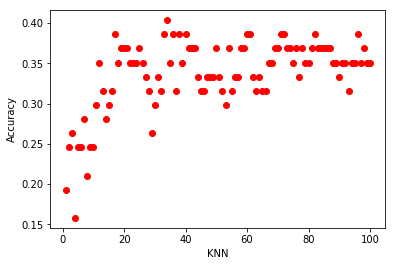

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(KNN_list, accuracy, 'ro')
plt.xlabel('KNN')
plt.ylabel('Accuracy')
plt.show()